In [1]:
import numpy as np
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
train['Age'].fillna(train['Age'].median(),inplace=True)
train['Embarked'].fillna('Q',inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test['Age'].fillna(test['Age'].median(),inplace=True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [9]:
train[train['Survived']==0]['Sex'].value_counts()#사망자 중 남자가 468,여자 81

male      468
female     81
Name: Sex, dtype: int64

In [10]:
train[train['Survived']==1]['Sex'].value_counts()#생존자 중 여자가 남자의 2배임

female    233
male      109
Name: Sex, dtype: int64

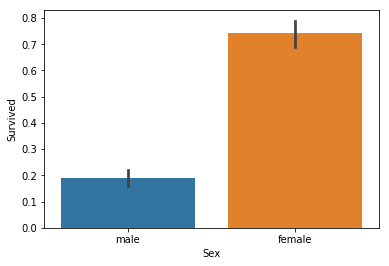

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Sex',y='Survived',data=train)

생존자들은 여자가 많고 사망자는 남자들이 많다

In [12]:
train[train['Survived']==1]['Pclass'].value_counts() #1등,3등석은 생존자가 다수

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [13]:
train[train['Survived']==0]['Pclass'].value_counts()#의외로 사망자가 3등석에서 많이 나옴

3    372
2     97
1     80
Name: Pclass, dtype: int64

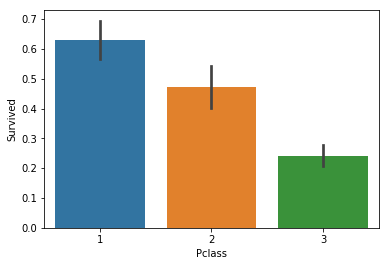

In [14]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.show()

3등석에 사망자가 더 많고 1등석에 생존자가 제일 많다

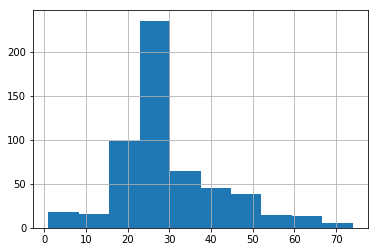

In [15]:
import matplotlib.pyplot as plt
train[train['Survived']==0]['Age'].hist()#20~30대에서 사망자가 많이 나왔음
plt.show()

In [16]:
train[train['Survived']==0]['Embarked'].value_counts()#S에서 사망자가 다수

S    427
C     75
Q     47
Name: Embarked, dtype: int64

In [17]:
train[train['Survived']==0]['SibSp'].value_counts()#혼자 있을 때 사망자가 많음

0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
train[train['Survived']==1]['SibSp'].value_counts()#혼자 있으나 같이 있어도 생존함

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [19]:
train[train['Survived']==0]['Parch'].value_counts()#자매나 부모를 태운 수가 없는 경우가 많음

0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64

In [20]:
train[train['Survived']==1]['Parch'].value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [21]:
x_train=train[['Pclass','Sex','Age','Parch','Embarked']]
y_train=train['Survived']

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Parch       891 non-null int64
Embarked    891 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [23]:
x_train.head()

,Pclass,Sex,Age,Parch,Embarked
0,3,male,22.0,0,S
1,1,female,38.0,0,C
2,3,female,26.0,0,S
3,1,female,35.0,0,S
4,3,male,35.0,0,S


In [24]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
x_test=test[['Pclass','Sex','Age','Parch','Embarked']]

In [26]:
submit=pd.read_csv('sample_submission.csv')
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [27]:
x_test.head()

,Pclass,Sex,Age,Parch,Embarked
0,3,male,34.5,0,Q
1,3,female,47.0,0,S
2,2,male,62.0,0,Q
3,3,male,27.0,0,S
4,3,female,22.0,1,S


In [28]:
x_train_data=x_train.values
x_test_data=x_test.values
print(type(y_train))
print(type(x_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
y_train_data=y_train.values
print(type(y_train_data))
print(type(x_train_data))
print(type(x_test_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(891, 5)
(418, 5)
(891,)


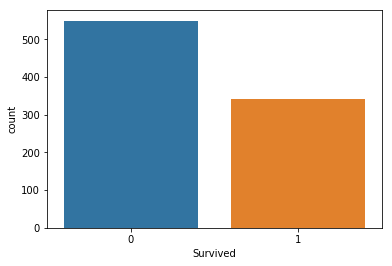

In [31]:
sns.countplot(x='Survived',data=train)

In [32]:
for i in range(len(x_train_data)):
    if x_train_data[i,1]=='male':
        x_train_data[i,1]=1.0
    else:
        x_train_data[i,1]=0.0
for i in range(len(x_test_data)):
    if x_test_data[i,1]=='male':
        x_test_data[i,1]=1.0
    else:
        x_test_data[i,1]=0.0

In [33]:
x_train_data

array([[3, 1.0, 22.0, 0, 'S'],
       [1, 0.0, 38.0, 0, 'C'],
       [3, 0.0, 26.0, 0, 'S'],
       ...,
       [3, 0.0, 28.0, 2, 'S'],
       [1, 1.0, 26.0, 0, 'C'],
       [3, 1.0, 32.0, 0, 'Q']], dtype=object)

In [34]:
for i in range(len(x_train_data)):
    if x_train_data[i,-1]=='S':
        x_train_data[i,-1]=1.0
    elif x_train_data[i,-1]=='C':
        x_train_data[i,-1]=2.0
    else:
        x_train_data[i,-1]=3.0
for i in range(len(x_test_data)):
    if x_test_data[i,-1]=='S':
        x_test_data[i,-1]=1.0
    elif x_test_data[i,-1]=='C':
        x_test_data[i,-1]=2.0
    else:
        x_test_data[i,-1]=3.0

In [35]:
x_train_data

array([[3, 1.0, 22.0, 0, 1.0],
       [1, 0.0, 38.0, 0, 2.0],
       [3, 0.0, 26.0, 0, 1.0],
       ...,
       [3, 0.0, 28.0, 2, 1.0],
       [1, 1.0, 26.0, 0, 2.0],
       [3, 1.0, 32.0, 0, 3.0]], dtype=object)

In [36]:
x_test_data

array([[3, 1.0, 34.5, 0, 3.0],
       [3, 0.0, 47.0, 0, 1.0],
       [2, 1.0, 62.0, 0, 3.0],
       ...,
       [3, 1.0, 38.5, 0, 1.0],
       [3, 1.0, 27.0, 0, 1.0],
       [3, 1.0, 27.0, 1, 2.0]], dtype=object)

In [37]:
y_train_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [38]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train_data,y_train_data)
#test['Survived']=logistic.predict(x_test_data)

C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
from xgboost import XGBClassifier
xg_boost=XGBClassifier()
xg_boost.fit(x_train_data,y_train_data)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [43]:
pred=xg_boost.predict(x_test_data)

In [44]:
submit['Survived']=pred
submit.to_csv('sample_submission_2.csv',index=False)

In [42]:
y_test_data=test['Survived'].values

In [43]:
y_real=submit['Survived'].values
np.mean(y_test_data==y_real)

0.9473684210526315

In [44]:
submit['Survived']=y_test_data
submit.to_csv('sample_submission_1.csv',index=False)

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train_data,y_train_data)

C:\Users\zzang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
y_predicted=forest.predict(x_test_data)
y_predicted

array([0.        , 0.        , 0.2       , 0.71666667, 0.55      ,
       0.29666667, 0.33116667, 0.        , 0.1       , 0.09674639,
       0.71666667, 0.02      , 1.        , 0.4       , 1.        ,
       0.82666667, 0.        , 0.36      , 0.90666667, 0.02      ,
       0.2       , 0.605     , 0.9       , 0.2       , 1.        ,
       0.        , 1.        , 0.375     , 0.12333333, 0.06666667,
       0.        , 0.        , 0.5       , 0.6       , 0.11111111,
       0.39055556, 0.90666667, 0.42833333, 0.22761405, 0.71666667,
       0.07857143, 0.93157895, 0.        , 1.        , 1.        ,
       0.22761405, 0.09333333, 0.05006999, 1.        , 0.5       ,
       0.3       , 0.15      , 1.        , 0.7       , 0.15      ,
       0.2       , 0.        , 0.22761405, 0.71666667, 1.        ,
       0.        , 0.32380952, 0.14246032, 0.8       , 0.8       ,
       0.6       , 0.1       , 0.        , 0.36111111, 1.        ,
       0.77916667, 0.09674639, 0.28619048, 0.15011905, 1.     

In [49]:
y_predicted=y_predicted.round(0)

In [50]:
np.mean(y_predicted==y_real)

0.8038277511961722

In [51]:
import keras
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential
model=Sequential()
model.add(Dense(16,input_shape=(5,),activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zzang\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 305
Trainable params: 273
Non-trainable params: 32
______________________

In [52]:
hist = model.fit(x_train_data,y_train_data,epochs=50,batch_size=16,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 4s 6ms/step - loss: 0.7796 - acc: 0.5534 - val_loss: 0.6928 - val_acc: 0.6760
Epoch 2/50
712/712 [==============================] - 0s 120us/step - loss: 0.7299 - acc: 0.6067 - val_loss: 0.6620 - val_acc: 0.6704
Epoch 3/50
712/712 [==============================] - 0s 101us/step - loss: 0.6873 - acc: 0.6264 - val_loss: 0.6445 - val_acc: 0.6704
Epoch 4/50
712/712 [==============================] - 0s 102us/step - loss: 0.6620 - acc: 0.6306 - val_loss: 0.6383 - val_acc: 0.7263
Epoch 5/50
712/712 [==============================] - 0s 100us/step - loss: 0.6574 - acc: 0.6348 - val_loss: 0.6290 - val_acc: 0.7207
Epoch 6/50
712/712 [==============================] - 0s 100us/step - loss: 0.6318 - acc: 0.6545 - val_loss: 0.6092 - val_acc: 0.7095
Epoch 7/50
712/712 [==============================] - 0s 116us/step - loss: 0.6286 - acc: 0.6362 - val_l

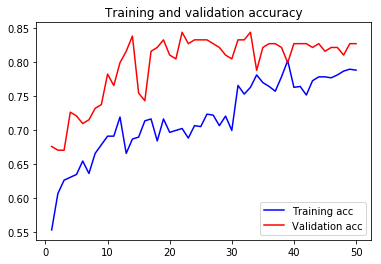

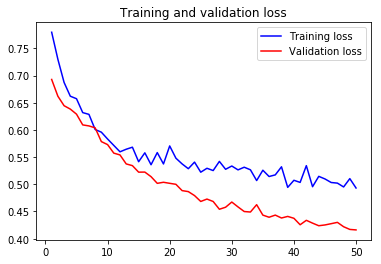

In [53]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
acc=hist.history['acc']
val_acc=hist.history['val_acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
test['Survived_1']=model.predict_classes(x_test_data)

In [55]:
y_test_data=test['Survived_1'].values

In [57]:
submission=submit.copy()

In [58]:
y_real=submit['Survived'].values

In [59]:
np.mean(y_test_data==y_real)

0.9090909090909091

In [60]:
submission['Survived']=y_test_data

In [61]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [62]:
submission.to_csv('gender_submission_1.csv',index=False)

In [108]:
import keras
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential
mse_model=Sequential()
mse_model.add(Dense(16,input_shape=(6,),activation='relu'))
mse_model.add(BatchNormalization())
mse_model.add(Dense(8,activation='relu'))
mse_model.add(Dense(1,activation='sigmoid'))
mse_model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
mse_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                112       
_________________________________________________________________
batch_normalization_6 (Batch (None, 16)                64        
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 321
Trainable params: 289
Non-trainable params: 32
_________________________________________________________________


In [109]:
mse_hist = model.fit(x_train_data,y_train_data,epochs=50,batch_size=16,validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 0s 667us/step - loss: 0.4803 - acc: 0.7781 - val_loss: 0.3744 - val_acc: 0.8547
Epoch 2/50
712/712 [==============================] - 0s 115us/step - loss: 0.4862 - acc: 0.7949 - val_loss: 0.3718 - val_acc: 0.8603
Epoch 3/50
712/712 [==============================] - 0s 117us/step - loss: 0.4990 - acc: 0.7781 - val_loss: 0.3724 - val_acc: 0.8659
Epoch 4/50
712/712 [==============================] - 0s 115us/step - loss: 0.4729 - acc: 0.7907 - val_loss: 0.3715 - val_acc: 0.8715
Epoch 5/50
712/712 [==============================] - 0s 115us/step - loss: 0.4988 - acc: 0.7949 - val_loss: 0.3687 - val_acc: 0.8715
Epoch 6/50
712/712 [==============================] - 0s 115us/step - loss: 0.4777 - acc: 0.7879 - val_loss: 0.3752 - val_acc: 0.8715
Epoch 7/50
712/712 [==============================] - 0s 116us/step - loss: 0.4861 - acc: 0.7879 - val_loss: 0.3814 - val_acc: 0.8659
Epoch 8/50
712/7

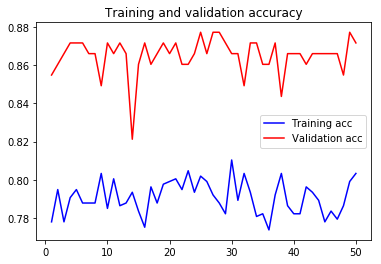

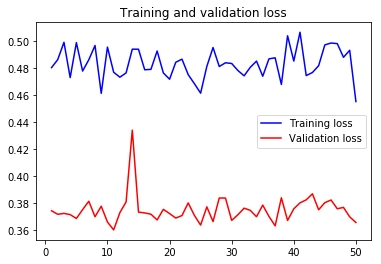

In [110]:
loss=mse_hist.history['loss']
val_loss=mse_hist.history['val_loss']
acc=mse_hist.history['acc']
val_acc=mse_hist.history['val_acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [111]:
test['Survived_1']=mse_model.predict_classes(x_test_data)

In [112]:
y_test_data1=test['Survived_1'].values

In [113]:
np.mean(y_test_data1==y_real)

0.3660287081339713

In [114]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [115]:
y_test_data1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,